# MACHINE LEARNING AN END TO END SOLUTION: Section 3

# Loan Application

Presented by Shaun &copy; 2018

Throughout the financial sector, machine learning algorithms are being developed to approve loan applications. In this project,we will process a dataset and use techniques to construct three machine learning models to predict on loan approvals. A dataset with 1102 observations will be examined, cleaned and organised; a data exploration will identify the features and their data types and the most important features, which are the best predictors for loan approvals. 

## Synthetic Minority Over-sampling Technique (SMOTE)

As we have seen so far, out of the box machine learning algorithms do not necessarily offer the best accuracy or performance, by performing hyperparameter tuning we can gain, improved accuracy and performance scores on the machine learning models. We use Synthetic Minority Over-sampling Technique (SMOTE) to balance out class labels, this finds minority class observations and creates similar, but randomly modified, new minority class observations. 

**SMOTE:** More details here:  __[SMOTE](https://pypi.org/project/imbalanced-learn/)__ 

**Note:**  *If you get this type of error:* **ImportError: No module named imbalanced_learn** <br>
You need to install the **imbalanced_learn** library: If you have installed Anaconda find your **conda.exe** location, open up a command prompt from there and install the imbalanced_learn library as shown here: **conda install -c glemaitre imbalanced-learn**
<img src="img/anaconda.JPG" width="280" height="280" align="left"/> <br><br>

In [53]:
import numpy as np
import pandas as pd


##import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##import train test split
from sklearn.model_selection import train_test_split

##import scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import cross_val_score  

#import SMOTE
from imblearn.over_sampling import SMOTE


##Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [54]:
predata = pd.read_csv('c:\\ml\\LoanPredOrig.csv')
predata = predata.dropna()
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset
predata['Loan_Status'] = predata.Loan_Status.astype(int)
predata['Employed'] = np.where(predata['Employed'].str.contains('YES'), 1, 0)
predata['Marital_Status'] = np.where(predata['Marital_Status'].str.contains('YES'), 1, 0)
predata['Graduate'] = np.where(predata['Graduate'].str.contains('YES'), 1, 0)
predata['Credit_History'] = np.where(predata['Credit_History'].str.contains('YES'), 1, 0)
predata['PropertyOwner'] = np.where(predata['PropertyOwner'].str.contains('YES'), 1, 0)
df = pd.DataFrame(predata)

#Drop the Loanid column
del df['Loanid']

#One hot encding on the Gender column
data = pd.get_dummies(df,columns=['Gender'])
 

### SMOTE 

**Note:** *The following:*  **SMOTE(random_state=42, ratio = 1.0)**  , *will upsample the minority class to ratio of 1.0. This means the classes will be balanced 1-1. Try different values for this and view the output from the print statements. You can measure the minority accuracy score results, and compare these to previous runs. You will have to compare accuracy scores on the minority class and agree on acceptable error/accuracy scores and decide what the best ratio is for each data challenge you have.*

**Note:**  *We will first create a set called: (X_trainsplit, y_trainsplit) so we can further create a validation set: (X_val, y_val) and the set:  (X_trainpre, y_trainpre) , which we will use to upsample the minority class and create the training set: (X_train, y_train )*

In [57]:

from sklearn.model_selection import train_test_split
X_trainsplit, X_test, y_trainsplit, y_test = train_test_split(data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'], stratify=data['Loan_Status'], test_size=0.30,random_state=42)


print('----------------------Pre-split Training Dataset-------------------------------')
print("Shape of the pre-split X_train dataset: ", X_trainsplit.shape)
print("Shape of the pre-split y_train dataset: ", y_trainsplit.shape)
print("Pre-split Training Dataset, counts of label '1': {}".format(sum(y_trainsplit==1)))
print("Pre-split Training Dataset, counts of label '0': {} \n".format(sum(y_trainsplit==0))) 
  

X_trainpre, X_val, y_trainpre, y_val = train_test_split(X_trainsplit,
                                                    y_trainsplit,
                                                      test_size = .1,
                                                    random_state=42)



print('-------------------Pre-SMOTE Training Dataset-----------------------------')
print("Shape of the Pre-SMOTE X_train dataset: ", X_trainpre.shape)
print("Shape of the Pre-SMOTE y_train dataset: ", y_trainpre.shape)
print("Pre-SMOTE Training Dataset, counts of label '1': {}".format(sum(y_trainpre==1)))
print("Pre-SMOTE Training Dataset, counts of label '0': {} \n".format(sum(y_trainpre==0))) 
 
sm = SMOTE(random_state=42, ratio = 1.0) #DeprecationWarning
X_train, y_train = sm.fit_sample(X_trainpre, y_trainpre)

 
print('--------------------SMOTE Training Dataset555555555 ---------------------------')
    
print("Shape of the SMOTE X_train dataset: ", X_train.shape)
print("Shape of the SMOTE y_train dataset: ", y_train.shape)


print("SMOTE Training Dataset, counts of y label '1': {}".format(sum(y_train==1)))
print("SMOTE Training Dataset, counts of y label '0': {}".format(sum(y_train==0))) 
 

----------------------Pre-split Training Dataset-------------------------------
Shape of the pre-split X_train dataset:  (770, 12)
Shape of the pre-split y_train dataset:  (770,)
Pre-split Training Dataset, counts of label '1': 520
Pre-split Training Dataset, counts of label '0': 250 

-------------------Pre-SMOTE Training Dataset-----------------------------
Shape of the Pre-SMOTE X_train dataset:  (693, 12)
Shape of the Pre-SMOTE y_train dataset:  (693,)
Pre-SMOTE Training Dataset, counts of label '1': 465
Pre-SMOTE Training Dataset, counts of label '0': 228 

--------------------SMOTE Training Dataset---------------------------
Shape of the SMOTE X_train dataset:  (930, 12)
Shape of the SMOTE y_train dataset:  (930,)
SMOTE Training Dataset, counts of y label '1': 465
SMOTE Training Dataset, counts of y label '0': 465


C:\Users\tulls\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


KNN , accuracy on training set: 0.83
KNN , accuracy on validation set: 0.70
KNN , accuracy on test set: 0.69
Precision: 0.795
Recall: 0.731
F1: 0.762


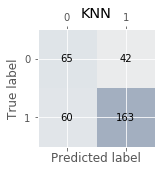

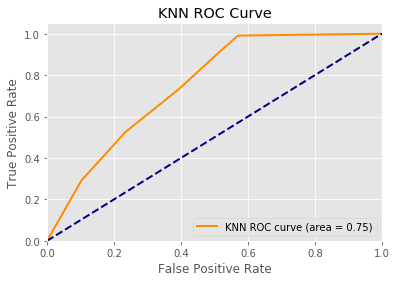

NB , accuracy on training set: 0.98
NB , accuracy on validation set: 1.00
NB , accuracy on test set: 0.99
Precision: 0.982
Recall: 1.000
F1: 0.991


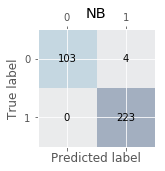

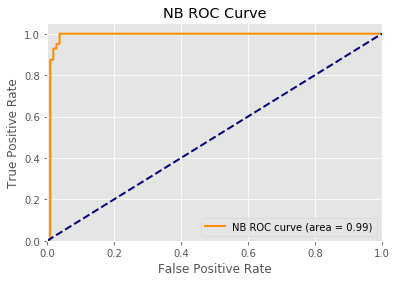

ANN , accuracy on training set: 0.64
ANN , accuracy on validation set: 0.61
ANN , accuracy on test set: 0.56
Precision: 0.813
Recall: 0.448
F1: 0.578


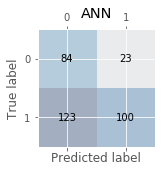

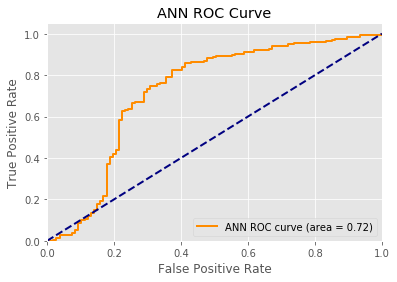

In [62]:
clfs = []
clfs.append(('KNN', KNeighborsClassifier()))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier()))



for name, clf in clfs:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    y_predict_probabilities = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    confmat =confusion_matrix(y_true=y_test, y_pred=predictions)
    #print(confmat)
    print(name,', accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print(name,', accuracy on validation set: {:.2f}'.format(clf.score(X_val, y_val)))
    print(name,', accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=predictions))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=predictions))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=predictions))
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title(name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    
    plt.figure()
    plt.title(name)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=name + ' ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()





# Section 3 Completed!